WELCOME!

In [ ]:
!pip install nba_api
!pip install pandas
!pip install plotly==5.15.0
!pip install seaborn
!pip install matplotlib
!pip install bokeh
from nba_api.stats.endpoints import playergamelog
from nba_api.stats.static import teams
from nba_api.stats.static import players
from nba_api.stats.endpoints import teamdashptshots
from nba_api.stats.endpoints import LeagueGameFinder
from nba_api.stats.endpoints import commonplayerinfo
from nba_api.stats.endpoints import playergamelogs
from nba_api.stats.endpoints import boxscoretraditionalv2
from nba_api.stats.endpoints import leaguedashteamstats
from nba_api.stats.endpoints import playercareerstats
from nba_api.stats.endpoints import shotchartdetail
from nba_api.stats.endpoints import playerawards
from nba_api.stats.endpoints import playerdashboardbyshootingsplits
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import pandas as pd

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.2/280.2 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 27.6 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1


ENDPOINTS, this is where the data lies. Our functions will search through these data endpoints to return output.You may need additional or new endpoints depending on the function you are working on. It would be helpful to repeat the import in this cell AND the cell the function is  in. ⛹


get_player_id():
this function is built to search a player by name and return player id, this player id will help specify other searches to a single player

In [ ]:
def get_team_id():
    from nba_api.stats.static import teams
    nba_teams = teams.get_teams()
    team_abbreviation = input("Enter team abbreviation (e.g., 'BOS' for Boston Celtics): ").upper()
    team_info = [team for team in nba_teams if team['abbreviation'] == team_abbreviation]
    if team_info:
        team_id = team_info[0]['id']
        team_name = team_info[0]['full_name']
        print(f"Team ID for {team_name} is {team_id}")
        return team_id
    else:
        print("Team not found. Please check the abbreviation and try again.")
        return None
team_id = get_team_id()


Enter team abbreviation (e.g., 'BOS' for Boston Celtics): MIN
Team ID for Minnesota Timberwolves is 1610612750


get_team_id returns a team ID to perform certain function regarding team stats and boxscores

In [ ]:
def pullplayer():
    from nba_api.stats.endpoints import playercareerstats
    player_id = input("Enter Player ID for career stats ")
    career = playercareerstats.PlayerCareerStats(player_id)
    career_df = career.get_data_frames()[0]
    return career_df
#Example usage
careerstats = pullplayer()
print(f"{careerstats}")

Enter Player ID for career stats 1628973
   PLAYER_ID SEASON_ID LEAGUE_ID     TEAM_ID TEAM_ABBREVIATION  PLAYER_AGE  \
0    1628973   2018-19        00  1610612742               DAL        22.0   
1    1628973   2019-20        00  1610612742               DAL        23.0   
2    1628973   2020-21        00  1610612742               DAL        24.0   
3    1628973   2021-22        00  1610612742               DAL        25.0   
4    1628973   2022-23        00  1610612752               NYK        26.0   
5    1628973   2023-24        00  1610612752               NYK        27.0   
6    1628973   2024-25        00  1610612752               NYK        28.0   

   GP  GS     MIN  FGM  ...  FT_PCT  OREB  DREB  REB  AST  STL  BLK  TOV   PF  \
0  73  38  1591.0  264  ...   0.725    25   144  169  230   37    4   88  127   
1  57  16  1022.0  181  ...   0.813    22   112  134  188   22    4   66   74   
2  68  12  1697.0  328  ...   0.795    27   204  231  239   35    1   80  109   
3  79  61 

PULLPLAYER pulls a player complete career history.

In [ ]:
def get_all_game_logs():
    from nba_api.stats.endpoints import playergamelogs
    player_id = input("Enter Player ID: ")
    stat = input("Enter stat to check and sort: ")
    threshold = int(input("Enter number for threshold: "))

    # Collect game logs
    game_logs = playergamelog.PlayerGameLog(player_id=player_id, season='2024-25')
    games_df = game_logs.get_data_frames()[0]
    # Sort game logs by the specified stat
    sorted_logs = games_df.sort_values(by= stat) #<---------- "GAME_DATE", last ten games, or by stat

    # Count how many times the stat exceeds the threshold
    count = (games_df[stat] >= threshold).sum()

    # Print the results
    print(f"The player has reached {threshold} {stat} in {count} games.")

    # Return the sorted game logs
    return sorted_logs

# Get and print the game logs

statcheck = get_all_game_logs()
print(statcheck[['GAME_DATE', 'MATCHUP', 'PTS', 'REB', 'AST', 'FG3M', 'STL', 'BLK']]) #Can add more stats

Enter Player ID: 1628401
Enter stat to check and sort: FG3M
Enter number for threshold: 3
The player has reached 3 FG3M in 38 games.
       GAME_DATE      MATCHUP  PTS  REB  AST  FG3M  STL  BLK
26  DEC 21, 2024    BOS @ CHI    8    4    1     0    0    1
50  OCT 26, 2024    BOS @ DET   17    6    3     0    0    3
31  DEC 06, 2024  BOS vs. MIL    6    6    7     0    3    0
17  JAN 10, 2025  BOS vs. SAC    3    1    3     0    1    2
16  JAN 12, 2025  BOS vs. NOP    6    4    2     0    3    1
43  NOV 08, 2024  BOS vs. BKN   14    3    6     1    0    3
15  JAN 15, 2025    BOS @ TOR    6    0    1     1    0    0
10  JAN 23, 2025    BOS @ LAL    3    3    3     1    0    1
30  DEC 07, 2024  BOS vs. MEM   10    6    3     2    3    2
18  JAN 05, 2025    BOS @ OKC   11    4    4     2    1    3
14  JAN 17, 2025  BOS vs. ORL   12    3    2     2    0    1
12  JAN 20, 2025    BOS @ GSW    8    5    5     2    1    3
37  NOV 22, 2024    BOS @ WAS   10    2    3     2    0    1
4   FEB 06, 2

get_all_game_logs is a function that can count the amount of games that a player has reached a threshold of a choosen stat.

In [ ]:
from bokeh.io import output_notebook
from bokeh.plotting import figure, show, ColumnDataSource
from bokeh.models import HoverTool
from bokeh.palettes import BuPu, Category10
from bokeh.transform import factor_cmap
from nba_api.stats.endpoints import leaguedashteamstats
import pandas as pd

output_notebook()

def teamSTATsearch():
    stat = input("Enter stat to sort by (e.g., 'PTS' for points per game): ").upper()
    userteam = input("Enter TEAM ABBREVIATION (e.g., 'BOS' for Boston Celtics): ").upper()

    team_stats_df = leaguedashteamstats.LeagueDashTeamStats().get_data_frames()[0]

    if stat not in team_stats_df.columns:
        print(f"Stat '{stat}' not found in the data frame.")
        return

    sorted_teams = team_stats_df.sort_values(by=stat, ascending=False).reset_index(drop=True)
    num_teams = len(sorted_teams)
    third = num_teams // 3

    top_third = sorted_teams.iloc[:third]
    middle_third = sorted_teams.iloc[third:2*third]
    bottom_third = sorted_teams.iloc[2*third:]

    overall_ranking = pd.concat([top_third, middle_third, bottom_third]).reset_index(drop=True)
    overall_ranking['Rank'] = overall_ranking.index + 1

    print("\nTop Third Teams:\n", top_third[['TEAM_NAME', stat]])
    print("\nMiddle Third Teams:\n", middle_third[['TEAM_NAME', stat]])
    print("\nBottom Third Teams:\n", bottom_third[['TEAM_NAME', stat]])

    team_rank = overall_ranking.loc[overall_ranking['TEAM_NAME'] == userteam]

    if not team_rank.empty:
        rank = team_rank.iloc[0]['Rank']
        print(f"\n{userteam} is ranked {rank} in {stat} with a value of {team_rank.iloc[0][stat]}.")
    else:
        print(f"\nTeam {userteam} not found in the current data.")

    # Create Bokeh plot
    source = ColumnDataSource(data=dict(
        team_names=overall_ranking['TEAM_NAME'].tolist(),
        stat_values=overall_ranking[stat],
        rank=overall_ranking['Rank']
    ))

    p = figure(x_range=overall_ranking['TEAM_NAME'].tolist(), height=500, title=f"NBA Team Rankings by {stat}",
               toolbar_location=None, tools="")

    p.vbar(x='team_names', top='stat_values', width=0.9, source=source,)
    p.xaxis.major_label_orientation = "vertical"
    p.xgrid.grid_line_color = None
    p.y_range.start = 0

    hover = HoverTool(tooltips=[("Team", "@team_names"), ("Rank", "@rank"), (stat, "@stat_values")])
    p.add_tools(hover)

    show(p)

teamSTATsearch()



Enter stat to sort by (e.g., 'PTS' for points per game): PTS
Enter TEAM ABBREVIATION (e.g., 'BOS' for Boston Celtics): BOS

Top Third Teams:
                TEAM_NAME   PTS
0         Denver Nuggets  6552
1      Memphis Grizzlies  6543
2    Cleveland Cavaliers  6494
3         Boston Celtics  6331
4          Atlanta Hawks  6272
5          Chicago Bulls  6270
6       Dallas Mavericks  6251
7        New York Knicks  6246
8       Sacramento Kings  6171
9  Oklahoma City Thunder  6147

Middle Third Teams:
                  TEAM_NAME   PTS
10         Detroit Pistons  6118
11  Minnesota Timberwolves  6028
12          Indiana Pacers  6015
13            Phoenix Suns  6002
14         Houston Rockets  5983
15         Toronto Raptors  5973
16         Milwaukee Bucks  5954
17   Golden State Warriors  5944
18  Portland Trail Blazers  5885
19    New Orleans Pelicans  5831

Bottom Third Teams:
              TEAM_NAME   PTS
20           Utah Jazz  5817
21  Philadelphia 76ers  5796
22  Los Angeles Lakers 

 teamSTATsearch is a function that ranks teams in order by a choosen stat. it seperates teams into 3rd

In [ ]:
from nba_api.stats.endpoints import leaguegamefinder
import pandas as pd

def get_team_game_logs():
    # Prompt the user to enter a team ID
    team_id = input("Enter the Team ID: ")

    try:
        # Search for games for the given team ID
        gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=team_id)
        games_df = gamefinder.get_data_frames()[0]
        if games_df.empty:
            print(f"No game logs found for Team ID: {team_id}.")
            return None

        # Filter and display the game logs for the 2024 season
        season_games = games_df[games_df.SEASON_ID.str[-4:] == '2024']
        if season_games.empty:
            print(f"No games found for Team ID: {team_id} in the 2024 season.")
            return None

        print(season_games[['GAME_DATE','GAME_ID', 'MATCHUP', 'WL', 'PTS', 'REB', 'AST', 'FG3M','FG3A', 'STL', 'BLK', 'PLUS_MINUS']])  # Display the filtered DataFrame
        return season_games  # Return the complete DataFrame for further use

    except Exception as e:
        print(f"An error occurred: {e}")
#Calling the function
team_logs = get_team_game_logs()



Enter the Team ID: 1610612738
     GAME_DATE     GAME_ID      MATCHUP WL  PTS  REB  AST  FG3M  FG3A  STL  \
0   2025-02-12  0022400769  BOS vs. SAS  W  116   56   25    18    55    3   
1   2025-02-10  0022400759    BOS @ MIA  W  103   52   24    17    53    4   
2   2025-02-08  0022400748    BOS @ NYK  W  131   48   21    19    39    6   
3   2025-02-06  0022400728  BOS vs. DAL  L  120   40   30    16    37    2   
4   2025-02-04  0022400710    BOS @ CLE  W  112   53   26    17    48   10   
..         ...         ...          ... ..  ...  ...  ...   ...   ...  ...   
60  2024-07-21  1522400071  BOS vs. PHI  L   98   35   21    11    35    2   
61  2024-07-19  1522400054  BOS vs. DAL  L   90   39   19    12    38    4   
62  2024-07-17  1522400041    BOS @ CHA  W   89   37   21     8    32   12   
63  2024-07-15  1522400029    BOS @ LAL  W   88   38   21    13    37    6   
64  2024-07-13  1522400010  BOS vs. MIA  L  114   35   23    11    32    8   

    BLK  PLUS_MINUS  
0     5    

Once you enter a Team ID, the get_team_game_logs function will return the latest gamelogs of that team. Also the boxscore name known as the game_id which can help you in other searches.

In [ ]:
from nba_api.stats.endpoints import playergamelog
import pandas as pd

def get_player_game_logs():
    # Prompt the user to enter a player ID
    player_id = input("Enter the Player ID: ")

    try:
        # Search for games for the given player ID
        gamefinder = playergamelog.PlayerGameLog(player_id=player_id, season='2024-25')  # Assuming you want the 2024-25 season
        games_df = gamefinder.get_data_frames()[0]

        if games_df.empty:
            print(f"No game logs found for Player ID: {player_id}.")
            return None

        # Display relevant columns (you can customize this)

        print(games_df[['GAME_DATE', 'MATCHUP', 'WL', 'PTS', 'REB', 'AST', 'FG3M', 'FG3A', 'STL', 'BLK', 'PLUS_MINUS']].to_string())
        return games_df  # Return the complete DataFrame for further use

    except Exception as e:
        print(f"An error occurred: {e}")

# Calling the function
player_logs = get_player_game_logs()

Enter the Player ID: 1628369
An error occurred: "['GAME_ID'] not in index"


Get player Logs!!

In [ ]:
def boxsc():
    from nba_api.stats.endpoints import playergamelog
    from nba_api.stats.endpoints import boxscoretraditionalv2
    usergame_id = input("Enter Game ID")
    stats = boxscoretraditionalv2.BoxScoreTraditionalV2(game_id= usergame_id)
    stats_df = stats.get_data_frames()[0]
    print (stats_df[['PLAYER_ID','PLAYER_NAME', 'PTS', 'REB', 'AST', 'FG3M','FG3A', 'STL', 'BLK']])
boxsc()

Enter Game ID0022400503
    PLAYER_ID          PLAYER_NAME   PTS   REB   AST  FG3M  FG3A  STL  BLK
0     1628415        Dillon Brooks  11.0   1.0   2.0   3.0   4.0  0.0  0.0
1     1641708        Amen Thompson  20.0  15.0   4.0   0.0   0.0  3.0  0.0
2     1630578       Alperen Sengun  26.0  10.0   6.0   0.0   2.0  2.0  0.0
3     1630224          Jalen Green  29.0   8.0   2.0   7.0  15.0  2.0  0.0
4     1627832        Fred VanVleet  19.0   1.0  12.0   2.0   9.0  4.0  1.0
5      203500         Steven Adams   0.0   6.0   0.0   0.0   0.0  0.0  0.0
6     1628988        Aaron Holiday   4.0   2.0   4.0   0.0   1.0  2.0  0.0
7     1630256        Jae'Sean Tate   2.0   1.0   0.0   0.0   1.0  1.0  0.0
8     1641715         Cam Whitmore  17.0   1.0   0.0   3.0   3.0  1.0  0.0
9      201145           Jeff Green   7.0   1.0   0.0   0.0   2.0  0.0  0.0
10    1629111         Jock Landale   0.0   3.0   1.0   0.0   0.0  0.0  0.0
11    1631466        Nate Williams   0.0   0.0   0.0   0.0   1.0  0.0  1.0
1

the boxsc function return the total of players in a game, also their player ID, A good way to get a team of players ID at once.

In [ ]:
def shotchart():
    from nba_api.stats.endpoints import shotchartdetail
    player_id = input("Enter Player ID: ")
    team_id = input("Enter Team ID: ")
    shot_chart = shotchartdetail.ShotChartDetail(player_id=player_id, team_id=team_id, context_measure_simple='FGA')
    shot_chart_df = shot_chart.get_data_frames()[0]
    print(shot_chart_df[['GAME_DATE','PERIOD','MINUTES_REMAINING', 'SECONDS_REMAINING','SHOT_MADE_FLAG', 'SHOT_ZONE_BASIC','SHOT_TYPE', 'SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE', 'SHOT_DISTANCE',]])
shotchart()



Enter Player ID: 1628973
Enter Team ID: 1610612752
    GAME_DATE  PERIOD  MINUTES_REMAINING  SECONDS_REMAINING  SHOT_MADE_FLAG  \
0    20241112       1                  9                 53               0   
1    20241112       1                  8                 31               0   
2    20241112       1                  6                 14               0   
3    20241112       1                  5                 49               0   
4    20241112       1                  3                 32               0   
..        ...     ...                ...                ...             ...   
851  20241215       4                  8                  3               1   
852  20241215       4                  6                 31               0   
853  20241215       4                  6                  7               1   
854  20241215       4                  3                 12               0   
855  20241215       4                  0                 36               0   



In [ ]:
from nba_api.stats.endpoints import shotchartdetail
import pandas as pd
from IPython.display import display

player_id = input("Enter Player ID: ")
team_id = input("Enter Team ID: ")
start_date_str = input("Enter start date (YYYY-MM-DD): ")
end_date_str = input("Enter end date (YYYY-MM-DD): ")

# Convert date strings to datetime objects
start_date = pd.to_datetime(start_date_str)
end_date = pd.to_datetime(end_date_str)

shot_chart = shotchartdetail.ShotChartDetail(player_id=player_id, team_id=team_id, context_measure_simple='FGA')
shot_chart_df = shot_chart.get_data_frames()[0]
shot_chart_df['GAME_DATE'] = pd.to_datetime(shot_chart_df['GAME_DATE'])
filtered_shot_chart_df = shot_chart_df[
    (shot_chart_df['GAME_DATE'] >= start_date) & (shot_chart_df['GAME_DATE'] <= end_date)
]

# Instead of overwriting shot_chart_df, select desired columns:
shot_chart_df = shot_chart_df[['GAME_DATE','PERIOD','MINUTES_REMAINING', 'SECONDS_REMAINING','SHOT_MADE_FLAG', 'SHOT_ZONE_BASIC','SHOT_TYPE', 'SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE', 'SHOT_DISTANCE']]
filtered_shot_chart_df = filtered_shot_chart_df[['GAME_DATE','PERIOD','MINUTES_REMAINING', 'SECONDS_REMAINING','SHOT_MADE_FLAG', 'SHOT_ZONE_BASIC','SHOT_TYPE', 'SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE', 'SHOT_DISTANCE']]
# View the head of the DataFrame and all its columns
with pd.option_context('display.max_columns', None):
    print(filtered_shot_chart_df.to_string())
    #display(shot_chart_df)

Enter Player ID: 1628368
Enter Team ID: 1610612758
Enter start date (YYYY-MM-DD): 2024-08-22
Enter end date (YYYY-MM-DD): 2025-02-15
     GAME_DATE  PERIOD  MINUTES_REMAINING  SECONDS_REMAINING  SHOT_MADE_FLAG        SHOT_ZONE_BASIC       SHOT_TYPE         SHOT_ZONE_AREA  SHOT_ZONE_RANGE  SHOT_DISTANCE
0   2024-11-15       1                 10                 50               1  In The Paint (Non-RA)  2PT Field Goal              Center(C)         8-16 ft.             13
1   2024-11-15       1                 10                  0               1      Above the Break 3  3PT Field Goal   Left Side Center(LC)          24+ ft.             25
2   2024-11-15       1                  9                 10               0              Mid-Range  2PT Field Goal   Left Side Center(LC)        16-24 ft.             17
3   2024-11-15       1                  7                  1               1  In The Paint (Non-RA)  2PT Field Goal              Center(C)         8-16 ft.             12
4   2024-11-

shotchart function returns the basic data of a players shot diet. **FOR THE ENTIRE SEASON**
***DATE COLUMN MAYBE GREAT FOR FILTERING****

Using this data we can filter for date and giving us a way to get single game charts, weekly charts, pre/post allstar charts.

plt.plot(xaxis, yaxis)
plt.show


Enter Player ID: 1641731
Enter Team ID: 1610612764
Enter start date (YYYY-MM-DD): 2025-02-03
Enter end date (YYYY-MM-DD): 2025-02-23


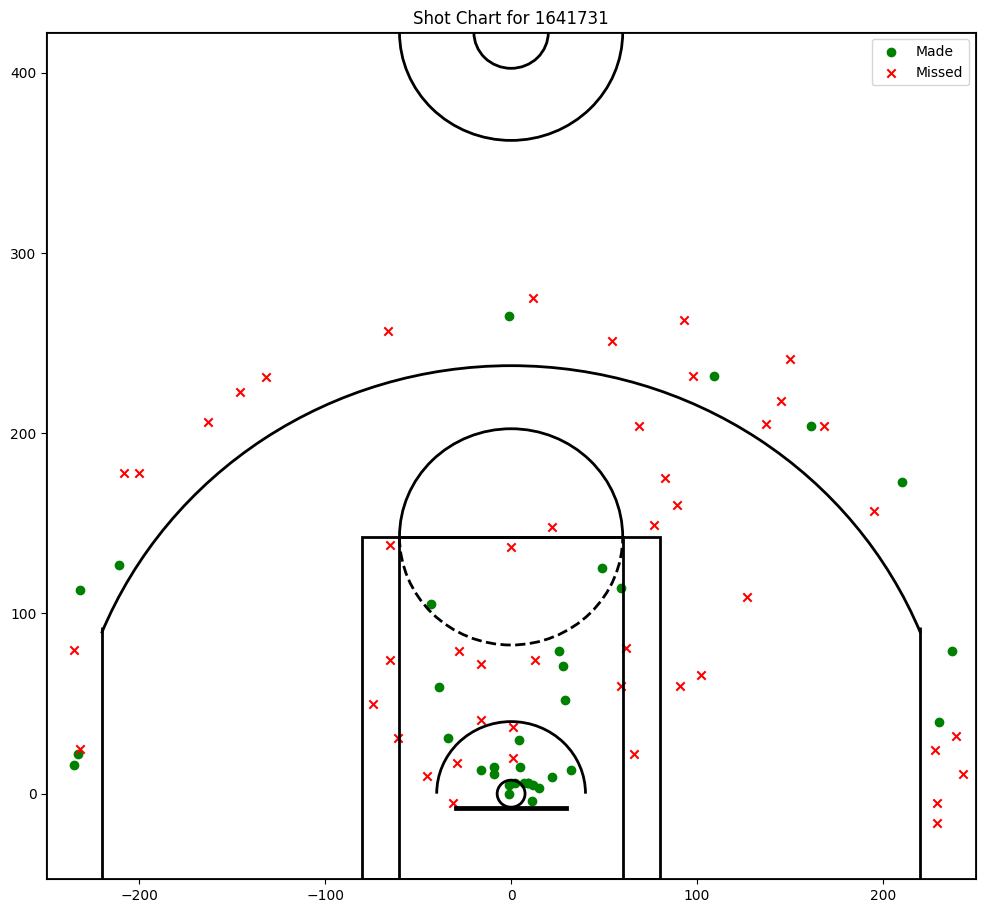

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from nba_api.stats.endpoints import shotchartdetail


from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

#plt.figure(figsize=(12,11))
#draw_court(outer_lines=True)
#plt.xlim(-300,300)
#plt.ylim(-100,500)
#plt.show()

def get_shot_chart_data(player_id, team_id):
    shot_chart = shotchartdetail.ShotChartDetail(player_id=player_id, team_id=team_id, context_measure_simple='FGA')
    shot_chart_df = shot_chart.get_data_frames()[0]
    shot_chart_df['GAME_DATE'] = pd.to_datetime(shot_chart_df['GAME_DATE'])
    start_date = pd.to_datetime(start_date_str)
    end_date = pd.to_datetime(end_date_str)
    filtered_df = shot_chart_df[
        (shot_chart_df['GAME_DATE'] >= start_date) &
        (shot_chart_df['GAME_DATE'] <= end_date)
    ]

    return filtered_df[['LOC_X', 'LOC_Y', 'SHOT_MADE_FLAG']]
    #return shot_chart_df[['LOC_X', 'LOC_Y', 'SHOT_MADE_FLAG']]  #### THIS CAN BE CHANGED, SHOTMADE, SHOTATTEMPT, Only select necessary columns


def plot_shot_chart_density(shot_chart_df,player_id, start_date, end_date):
    # Create a jointplot with a 2D KDE plot for density
    joint_plot = sns.jointplot(x=shot_chart_df['LOC_X'], y=shot_chart_df['LOC_Y'], kind='kde', cmap='Blues', fill=True)

    # Add court lines (using your draw_court function)
    draw_court(ax=joint_plot.ax_joint)

    # Set plot limits for better visualization
    joint_plot.ax_joint.set_xlim(-250, 250)
    joint_plot.ax_joint.set_ylim(-47.5, 422.5)

    # Show the plot
    plt.show()

# Get player and team IDs (you can use your existing functions)
player_id = input("Enter Player ID: ")
team_id = input("Enter Team ID: ")
start_date_str = input("Enter start date (YYYY-MM-DD): ")
end_date_str = input("Enter end date (YYYY-MM-DD): ")

# Get shot chart data
shot_chart_data = get_shot_chart_data(player_id, team_id)

# Plot the shot chart density
#plot_shot_chart_density(shot_chart_data)



#############################################


def plot_shot_chart_points(shot_chart_df):
    # Create a scatter plot for made and missed shots
    plt.figure(figsize=(12, 11))  # Adjust figure size as needed

    # Filter data for made and missed shots
    made_shots = shot_chart_data[shot_chart_data['SHOT_MADE_FLAG'] == 1]
    missed_shots = shot_chart_data[shot_chart_data['SHOT_MADE_FLAG'] == 0]

    # Plot made shots in green and missed shots in red
    plt.scatter(made_shots['LOC_X'], made_shots['LOC_Y'], color='green', marker='o', label='Made')
    plt.scatter(missed_shots['LOC_X'], missed_shots['LOC_Y'], color='red', marker='x', label='Missed')

    # Add court lines (using your draw_court function)
    draw_court(outer_lines=True)

    # Set plot limits for better visualization
    plt.xlim(-250, 250)
    plt.ylim(-47.5, 422.5)

    # Add legend and title
    plt.legend()
    plt.title("Shot Chart for "+ player_id)

    # Show the plot
    plt.show()



#call to plot_shot_chart_points:
plot_shot_chart_points(shot_chart_data)


In [ ]:
from bokeh.io import output_notebook
output_notebook()
from bokeh.plotting import figure, show, ColumnDataSource
from bokeh.models import HoverTool, LinearColorMapper
from nba_api.stats.endpoints import shotchartdetail
import pandas as pd
import datetime
from bokeh.palettes import Category10  # or any other palette
from bokeh.plotting import figure, show, ColumnDataSource
from bokeh.models import HoverTool, LinearColorMapper
from bokeh.palettes import Category10

def plot_shot_chart_bokeh(shot_chart_data):

    player_id = input("Enter Player ID: ")
    team_id = input("Enter Team ID: ")
    start_date = input("Enter start date (YYYY-MM-DD): ")
    end_date = input("Enter end date (YYYY-MM-DD): ")
    shot_chart = shotchartdetail.ShotChartDetail(player_id=player_id, team_id=team_id, context_measure_simple='FGA')
    shot_chart_df = shot_chart.get_data_frames()[0]
    shot_chart_df[['LOC_X', 'LOC_Y', 'SHOT_MADE_FLAG', 'SHOT_ZONE_RANGE', 'SHOT_DISTANCE','PERIOD']]
    shot_chart_df['GAME_DATE'] = pd.to_datetime(shot_chart_df['GAME_DATE'])
    start_date = pd.to_datetime(start_date_str)
    end_date = pd.to_datetime(end_date_str)
    filtered_shot_chart_df = shot_chart_df[
        (shot_chart_df['GAME_DATE'] >= start_date) & (shot_chart_df['GAME_DATE'] <= end_date)
    ]



    # Prepare the data with ColumnDataSource
    source = ColumnDataSource(data={
        'x': filtered_shot_chart_df['LOC_X'],
        'y': filtered_shot_chart_df['LOC_Y'],
        'made': filtered_shot_chart_df['SHOT_MADE_FLAG'],
        'text': ["Made" if m else "Missed" for m in filtered_shot_chart_df['SHOT_MADE_FLAG']],
        'SHOT_RANGE': filtered_shot_chart_df['SHOT_ZONE_AREA'],
        'SHOT_DISTANCE': filtered_shot_chart_df['SHOT_DISTANCE'],
        'PERIOD': filtered_shot_chart_df['PERIOD']
    })

    # Create the figure
    p = figure(width=600, height=600, title="Shot Chart",
               tools="pan,wheel_zoom,reset",
               x_range=(-250, 250), y_range=(-50, 450))

    # Color Mapper for made and missed shots (0=Missed, 1=Made)
    color_mapper = LinearColorMapper(palette=['red', 'green'], low=0, high=1)

    # Scatter plot with colors based on made/missed shots, using the color mapper
    p.scatter(x='x', y='y', size=10,
              color={'field': 'made', 'transform': color_mapper},  # Reference 'made' field and apply color mapper
              source=source)

    # Add a hover tool
    hover = HoverTool()
    hover.tooltips = [("Shot", "@text"), ("SHOT_RANGE", "@SHOT_RANGE"), ("SHOT_DISTANCE", "@SHOT_DISTANCE"), ("Quater", "@PERIOD")]
    p.add_tools(hover)

    # Show plot
    show(p)
plot_shot_chart_bokeh(shot_chart_data)

NameError: name 'shot_chart_data' is not defined

In [ ]:
from bokeh.io import output_notebook
output_notebook()
from bokeh.plotting import figure, show, ColumnDataSource
from bokeh.models import HoverTool, Legend, LegendItem, LinearColorMapper
from nba_api.stats.endpoints import shotchartdetail
import pandas as pd
from bokeh.transform import factor_cmap
from bokeh.palettes import Viridis256

def plot_shot_chart_bokeh_zones():
    player_id = input("Enter Player ID: ")
    team_id = input("Enter Team ID: ")
    start_date = input("Enter start date (YYYY-MM-DD): ")
    end_date = input("Enter end date (YYYY-MM-DD): ")

    # Get shot chart data
    shot_chart = shotchartdetail.ShotChartDetail(
        player_id=player_id, team_id=team_id, context_measure_simple='FGA')
    shot_chart_df = shot_chart.get_data_frames()[0]
    shot_chart_df['GAME_DATE'] = pd.to_datetime(shot_chart_df['GAME_DATE'])
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    filtered_shot_chart_df = shot_chart_df[
        (shot_chart_df['GAME_DATE'] >= start_date) &
        (shot_chart_df['GAME_DATE'] <= end_date)]

    # Compute shooting percentage for each zone
    zone_stats = filtered_shot_chart_df.groupby('SHOT_ZONE_BASIC').agg(
        total_shots=('SHOT_MADE_FLAG', 'count'),
        made_shots=('SHOT_MADE_FLAG', 'sum')
    ).reset_index()
    zone_stats['shooting_percentage'] = (zone_stats['made_shots'] / zone_stats['total_shots']) * 100

    # Assign colors to shot zones
    min_shooting = zone_stats['shooting_percentage'].min()
    max_shooting = zone_stats['shooting_percentage'].max()
    color_mapper = LinearColorMapper(palette=Viridis256, low=min_shooting, high=max_shooting)


    # Create figure
    p = figure(width=600, height=600, title="Shot Chart by Zone",
               tools="pan,wheel_zoom,reset",
               x_range=(-250, 250), y_range=(-50, 450))

    legend_items = []

    # Plot shots per zone
    for _, row in zone_stats.iterrows():
        zone = row['SHOT_ZONE_BASIC']
        zone_data = filtered_shot_chart_df[filtered_shot_chart_df['SHOT_ZONE_BASIC'] == zone]
        source = ColumnDataSource(data={
            'x': zone_data['LOC_X'],
            'y': zone_data['LOC_Y'],
            'text': ["Made" if m else "Missed" for m in zone_data['SHOT_MADE_FLAG']],
            'SHOT_RANGE': zone_data['SHOT_ZONE_AREA'],
            'SHOT_DISTANCE': zone_data['SHOT_DISTANCE'],
            'PERIOD': zone_data['PERIOD'],
            'shooting_percentage': [row['shooting_percentage']] * len(zone_data)
        })

        glyph = p.scatter(x='x', y='y', size=10,
                          color={'field': 'shooting_percentage', 'transform': color_mapper},
                          alpha=0.8, source=source)

        legend_items.append(
            LegendItem(label=f"{zone}: {row['shooting_percentage']:.1f}%", renderers=[glyph]))

    # Add hover tool
    hover = HoverTool(tooltips=[("Shot", "@text"), ("SHOT_RANGE", "@SHOT_RANGE"),
                                ("SHOT_DISTANCE", "@SHOT_DISTANCE"), ("Quarter", "@PERIOD"),
                                ("Shooting %", "@shooting_percentage{0.1f}%")])
    p.add_tools(hover)

    # Add legend
    legend = Legend(items=legend_items, location="top_right")
    p.add_layout(legend)

    # Show plot
    show(p)

plot_shot_chart_bokeh_zones()


Enter Player ID: 201939
Enter Team ID: 1610612744
Enter start date (YYYY-MM-DD): 2025-02-01
Enter end date (YYYY-MM-DD): 2025-03-02


In [ ]:
def get_player_id():
    # How to player ID, NEED THIS FOR ANY ACTION
    from nba_api.stats.static import players
    player_dict = players.get_players()
    player_name = input("Please enter player name: ") ##SPELL CORRECTLY!!
    player_info = [player for player in player_dict if player['full_name'] == player_name][0] #this is the actual search,
    player_id = player_info['id']
    return player_id
# Example usage
player_id = get_player_id()
print(f"Your player ID is: {player_id}")

Please enter player name: Stephen Curry
Your player ID is: 201939


In [ ]:
import re
from nba_api.stats.endpoints import playercareerstats, playerawards

def career_traject():
    # Get player IDs
    player1_id = input("Enter Player 1 ID: ")
    player2_id = input("Enter Player 2 ID: ")

    # Career stats
    career1 = playercareerstats.PlayerCareerStats(player1_id).get_data_frames()[0]
    career2 = playercareerstats.PlayerCareerStats(player2_id).get_data_frames()[0]

    # Define stats to convert to per-game
    counting_stats = ['PTS', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'FGM', 'FGA']

    for stat in counting_stats:
        career1[f'{stat}_PER_GAME'] = career1[stat] / career1['GP']
        career2[f'{stat}_PER_GAME'] = career2[stat] / career2['GP']

    # Awards
    awards1 = playerawards.PlayerAwards(player1_id).get_data_frames()[0]
    awards2 = playerawards.PlayerAwards(player2_id).get_data_frames()[0]

    important_awards = {
        "NBA Most Valuable Player": "MVP",
        "Rookie of the Year": "ROY",
        "Defensive Player of the Year": "DPOY",
        "Sixth Man of the Year": "6MOY",
        "NBA Finals Most Valuable Player": "Finals MVP",
        "All-Defensive Team": "All-Defensive",
        "NBA Defensive Player of the Year": "DPOY",
        "NBA Champion": "Champ",
        "NBA All-Star": "All-Star",
    }

    def parse_awards(awards_df):
        parsed_awards = {award: 0 for award in important_awards.values()}
        all_nba_teams = set()  # Track unique team numbers

        for _, row in awards_df.iterrows():
            award_name = row['DESCRIPTION']

            # Count important awards
            if award_name in important_awards:
                parsed_awards[important_awards[award_name]] += 1

            # Handle All-NBA separately
            if award_name == "All-NBA" and "ALL_NBA_TEAM_NUMBER" in row and pd.notna(row["ALL_NBA_TEAM_NUMBER"]):
                all_nba_teams.add(int(row["ALL_NBA_TEAM_NUMBER"]))  # Store unique team numbers

        # Add unique All-NBA counts
        for team_number in sorted(all_nba_teams):
            suffix = "st" if team_number == 1 else "nd" if team_number == 2 else "rd"
            parsed_awards[f"All-NBA {team_number}{suffix} Team"] = list(all_nba_teams).count(team_number)

        return parsed_awards

    parsed_awards1 = parse_awards(awards1)
    parsed_awards2 = parse_awards(awards2)

    return career1, career2, parsed_awards1, parsed_awards2

# Example usage
player1_data, player2_data, player1_awards, player2_awards = career_traject()
print(player1_data.to_string())  # Player 1 career stats
print(player1_awards)

print(player2_data.to_string())  # Player 2 career stats
print(player2_awards)


Enter Player 1 ID: 203507
Enter Player 2 ID: 201939
    PLAYER_ID SEASON_ID LEAGUE_ID     TEAM_ID TEAM_ABBREVIATION  PLAYER_AGE  GP  GS     MIN  FGM   FGA  FG_PCT  FG3M  FG3A  FG3_PCT  FTM  FTA  FT_PCT  OREB  DREB  REB  AST  STL  BLK  TOV   PF   PTS  PTS_PER_GAME  REB_PER_GAME  AST_PER_GAME  STL_PER_GAME  BLK_PER_GAME  TOV_PER_GAME  FGM_PER_GAME  FGA_PER_GAME
0      203507   2013-14        00  1610612749               MIL        19.0  77  23  1897.0  173   418   0.414    41   118    0.347  138  202   0.683    78   261  339  150   60   61  122  173   525      6.818182      4.402597      1.948052      0.779221      0.792208      1.584416      2.246753      5.428571
1      203507   2014-15        00  1610612749               MIL        20.0  81  71  2541.0  383   780   0.491     7    44    0.159  257  347   0.741   100   442  542  207   73   85  173  254  1030     12.716049      6.691358      2.555556      0.901235      1.049383      2.135802      4.728395      9.629630
2      203507   20

I would like to add a player comparison, not just a head to head of counting stats. But a career trajectory. This is the most complicated of the fuctions because of the math involved. I am going to try to list the steps here.
1) Collect data such as counting stats and awards
2)Calculate data, this requires per game numbers, and sorting of awards
3)Giving those awards and stats a weighted score

Award sorting has proven to be a task. I would like to seperate the types of All Nba teams a player can recieve. Right now I can count them as aa whole. In the data frame there is a Element of ALL NBA TEAM NUMBER. I have the information but still cannot get to it.


In [ ]:
from nba_api.stats.endpoints import playergamelog
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.layouts import column
from bokeh.io import output_notebook

def get_player_game_logs():
    player_id = input("Enter the Player ID: ")

    try:
        gamefinder = playergamelog.PlayerGameLog(player_id=player_id, season='2024-25')
        games_df = gamefinder.get_data_frames()[0]

        if games_df.empty:
            print(f"No game logs found for Player ID: {player_id}.")
            return None

        print(games_df[['GAME_DATE', 'MATCHUP', 'WL', 'PTS', 'REB', 'AST', 'FG3M', 'FG3A', 'STL', 'BLK', 'PLUS_MINUS']].to_string())

        return games_df

    except Exception as e:
        print(f"An error occurred: {e}")

def plot_regression_bokeh(games_df):
    # Prepare data
    X = games_df[['FGA']].values  # Independent variable: Field Goal Attempts
    y = games_df['PTS'].values    # Dependent variable: Points

    # Linear Regression
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

    # Prepare Bokeh data source
    source = ColumnDataSource(data=dict(
        x=X.flatten(),  # Flatten to avoid issues
        y=y,
        y_pred=y_pred,
        #residuals=residuals,
        WL=games_df['WL'].apply(lambda x: 'Win' if x == 'W' else 'Loss'),
        game_date=games_df['GAME_DATE'],
        matchup=games_df['MATCHUP'],
        #rolling_avg_pts=games_df['rolling_avg_pts']
        ))
    #SOURCE CAN HELP CREATE A BETTER PICTURE

    # Create a figure
    p = figure(title="Linear Regression: FGA vs. Points",
               x_axis_label='Field Goal Attempts (FGA)', y_axis_label='Points (PTS)',
               tools="pan,box_zoom,reset,hover")

    # Add scatter plot (Actual Points)
    p.scatter('x', 'y', source=source, legend_label="Actual Points", size=8, color="blue", alpha=0.7)

    # Add regression line
    p.line('x', 'y_pred', source=source, legend_label="Regression Line", line_width=2, color="red")

    hover = HoverTool()
    hover.tooltips = [("Game Date", "@game_date"), ("Points", "@y"), ("FGA", "@x"), ("OPP", "@matchup")]
    p.add_tools(hover)

    # Display plot
    p.legend.location = "top_left"
    p.legend.title = "Legend"
    output_notebook()  # Display in the notebook (if using Jupyter)
    show(p)

# Get game logs and apply regression
player_logs = get_player_game_logs()
if player_logs is not None:
    plot_regression_bokeh(player_logs)


Enter the Player ID: 1641731
       GAME_DATE      MATCHUP WL  PTS  REB  AST  FG3M  FG3A  STL  BLK  PLUS_MINUS
0   FEB 21, 2025  WAS vs. MIL  L    7    5    4     0     3    0    0           1
1   FEB 12, 2025  WAS vs. IND  L    3    5    8     1     4    0    0          -6
2   FEB 10, 2025  WAS vs. SAS  L   10    3    4     2     5    1    0         -27
3   FEB 08, 2025  WAS vs. ATL  L   17    7    0     1     5    1    1          -8
4   FEB 07, 2025  WAS vs. CLE  L   16    6    4     2     4    3    0           0
5   FEB 05, 2025    WAS @ BKN  W   11   10   11     0     3    2    1          22
6   FEB 03, 2025    WAS @ CHA  W   26    5    3     4     8    2    0          -5
7   FEB 01, 2025    WAS @ MIN  W   14    4    5     2     2    2    2           0
8   JAN 30, 2025  WAS vs. LAL  L    6    3    0     0     2    0    0         -25
9   JAN 29, 2025  WAS vs. TOR  L    8    2    1     1     4    1    0         -30
10  JAN 27, 2025    WAS @ DAL  L   16    4    5     2     6    2    2

Logistic regression points. Really just a scatter plot with the tracjectory in the middle. You tell me is this a predictor?

In [ ]:
#POSITIONAL DEFENSIVE EFFICENCY
import pandas as pd
from nba_api.stats.endpoints import leaguegamefinder, playergamelogs

def POSITIONAL_DEFENSIVE_EFFICENCY():
    team_id = input("Enter Team ID: ").strip()  # Example: Knicks = 1610612752
    position = input("Enter Position (PG, SG, SF, PF, C): ").strip().upper()



    gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=team_id)
    games_df = gamefinder.get_data_frames()[0]
    if games_df.empty:
            print(f"No game logs found for Team ID: {team_id}.")
            return None
    # Get all games for the selected team
    season_games = games_df[games_df.SEASON_ID.str[-4:] == '2025']
    if season_games.empty:
        print(f"No games found for Team ID: {team_id} in the 24-25 season.")
    return None
    # Get all player game logs
    player_logs = playergamelogs.PlayerGameLogs(season_nullable=season).get_data_frames()[0]

    # Filter for games against the selected team
    player_logs = player_logs[player_logs['MATCHUP'].str.contains(team_games.iloc[0]['TEAM_ABBREVIATION'])]

    # Filter by the chosen position
    position_logs = player_logs[player_logs['POSITION'] == position]

    # Sum total points scored by that position vs the team
    total_points = position_logs['PTS'].sum()

    # Calculate per-game average
    games_played = len(team_games)
    avg_points_allowed = total_points / games_played if games_played else 0

    print(f"Total points allowed to {position}: {total_points}")
    print(f"Average points allowed per game: {avg_points_allowed:.2f}")

POSITIONAL_DEFENSIVE_EFFICENCY()


Enter Team ID: 1610612752
Enter Position (PG, SG, SF, PF, C): C
No games found for Team ID: 1610612752 in the 24-25 season.


^^^^IN PROGRESS POSITIONAL DEFENSIVE COUNT^^^^^

In [ ]:
import numpy as np
import pandas as pd
from nba_api.stats.endpoints import playercareerstats, playerawards
from bokeh.plotting import figure, show
from bokeh.models import HoverTool, ColumnDataSource


def calculate_career_score(player_id, award_weights, position_weights):
    # Get career stats and awards data
    career_stats = playercareerstats.PlayerCareerStats(player_id).get_data_frames()[0]
    awards_df = playerawards.PlayerAwards(player_id).get_data_frames()[0]

    # Calculate stats score
    stats_per_game = {stat: career_stats[stat].sum() / career_stats['GP'].sum() for stat in ['PTS', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'FG3M', 'FG3A']}
    role = classify_player(stats_per_game)  # Assuming classify_player is defined elsewhere


    # Normalize stats based on player role
    norm_stats = normalize_stats(stats_per_game, position_weights.get(role, {}))  # Normalize based on the role's weights
    # Calculate weighted award score
    parsed_awards = parse_awards(awards_df)
    weighted_awards_score = 0
    for award, count in parsed_awards.items():
        if award in award_weights:
            weighted_awards_score += count * award_weights[award]

    # Combine stats and awards into a total career score
    total_score = sum(norm_stats.values()) + weighted_awards_score

    return total_score

def classify_player(stats):
    thresholds = {
        "Rim Protector": {"BLK": 2.0, "REB": 8.0},
        "3PT Specialist": {"FG3M": 2.5, "FG3A": 6.0},
        "Playmaker": {"AST": 6.0, "TOV": 2.5},
        "Scorer": {"PTS": 20.0, "FGA": 15.0},
    }
    for role, criteria in thresholds.items():
        if all(stats.get(stat, 0) >= value for stat, value in criteria.items()):
            return role
    return "Position-Based"

def normalize_stats(stats, weights):
    norm_stats = {}
    for stat, value in stats.items():
        norm_stats[stat] = value * weights.get(stat, 1.0)
    return norm_stats

def parse_awards(awards_df):
    important_awards = {
        "NBA Most Valuable Player": "MVP",
        "Rookie of the Year": "ROY",
        "Defensive Player of the Year": "DPOY",
        "Sixth Man of the Year": "6MOY",
        "NBA Finals Most Valuable Player": "Finals MVP",
        "All-Defensive Team": "All-Defensive",
        "NBA Defensive Player of the Year": "DPOY",
        "NBA Champion": "Champ",
        "NBA All-Star": "All-Star",
    }
    parsed_awards = {award: 0 for award in important_awards.values()}
    all_nba_teams = set()

    for _, row in awards_df.iterrows():
        award_name = row['DESCRIPTION']

        # Count important awards
        if award_name in important_awards:
            parsed_awards[important_awards[award_name]] += 1

        # Handle All-NBA separately
        if "All-NBA" in award_name and "ALL_NBA_TEAM_NUMBER" in row and pd.notna(row["ALL_NBA_TEAM_NUMBER"]):
            team_number = int(row["ALL_NBA_TEAM_NUMBER"])
            all_nba_teams.add(team_number)

    # Add unique All-NBA counts
    for team_number in sorted(all_nba_teams):
        suffix = "st" if team_number == 1 else "nd" if team_number == 2 else "rd"
        parsed_awards[f"All-NBA {team_number}{suffix} Team"] = list(all_nba_teams).count(team_number)

    return parsed_awards

award_weights = {
    "MVP": 10.0,
    "ROY": 5.0,
    "DPOY": 7.0,
    "6MOY": 4.0,
    "Finals MVP": 12.0,
    "All-Defensive": 6.0,
    "Champ": 8.0,
    "All-Star": 5.0,
    "All-NBA 1st Team": 9.0,
    "All-NBA 2nd Team": 7.0,
    "All-NBA 3rd Team": 6.0
}

position_weights = {
    "Rim Protector": {"BLK": 1.5, "REB": 1.2},
    "3PT Specialist": {"FG3M": 1.5, "FG3A": 1.3},
    "Playmaker": {"AST": 1.4, "TOV": -0.5},
    "Scorer": {"PTS": 1.5, "FGA": 1.2},
    "Position-Based": {stat: 1.0 for stat in ["PTS", "REB", "AST", "STL", "BLK", "TOV", "FG3M", "FG3A"]},
}
#MORE POSITIONS CAN BE ADDED

player_id = input("Enter Player ID: ")
career_score = calculate_career_score(player_id, award_weights, position_weights)
print(f"Career Score: {career_score}")



Enter Player ID: 203083


KeyboardInterrupt: 